<a href="https://colab.research.google.com/github/jooharver/PCVK_Eka_Krisna_Ferian_TI-3D_2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**F. TUGAS PRAKTIKUM**

**1. Buat Gamma Correction sesuai dengan petunjuk berikut**
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


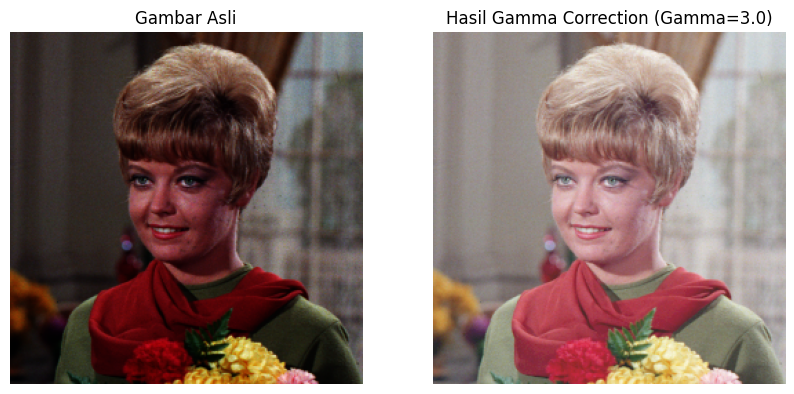

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Meminta input dari pengguna
print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Fungsi untuk melakukan Gamma Correction
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load gambar dari Google Drive
# Pastikan path gambar benar dan file ada
image_path = '/content/drive/MyDrive/PCVK/images/female.tiff'
image = cv2.imread(image_path)

# Periksa apakah gambar berhasil dimuat
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Konversi gambar ke RGB agar bisa ditampilkan di matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Lakukan Gamma Correction
    gamma_corrected = gamma_correction(image_rgb, gamma)

    # Menampilkan gambar asli dan hasil Gamma Correction
    plt.figure(figsize=(10, 5))

    # Gambar asli
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Gambar Asli')
    plt.axis('off')

    # Gambar hasil Gamma Correction
    plt.subplot(1, 2, 2)
    plt.imshow(gamma_corrected)
    plt.title(f'Hasil Gamma Correction (Gamma={gamma})')
    plt.axis('off')

    plt.show()

**2. Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

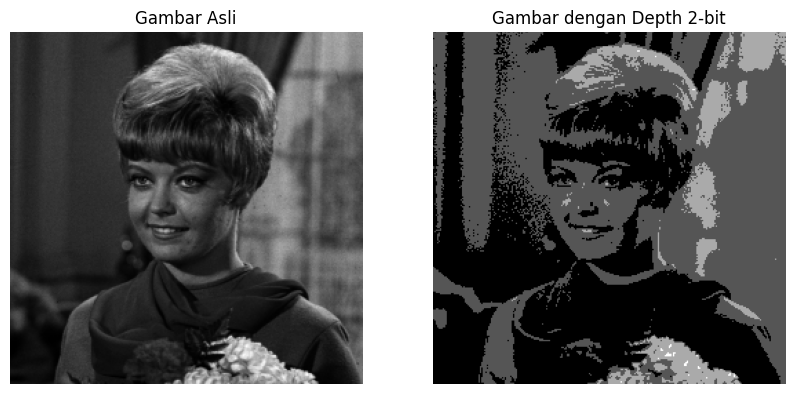

In [10]:
# Nilai kedalaman bit
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar dalam mode grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff', cv.IMREAD_GRAYSCALE)

# Membuat citra dengan kedalaman bit yang baru
depth_image = np.zeros(original.shape, original.dtype)

# Melakukan kuantisasi pada citra berdasarkan bit depth
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

# Menampilkan gambar asli dan hasil kuantisasi
plt.figure(figsize=(10, 5))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Gambar Asli')
plt.axis('off')

# Gambar dengan simulasi depth
plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Gambar dengan Depth {bit_depth}-bit')
plt.axis('off')

plt.show()


**3. Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Jumlah Citra di Average  Nilai PSNR (dB)
0                        5        27.528973
1                       30        27.477970
2                       60        27.417371
3                       80        27.402658
4                      100        27.370931


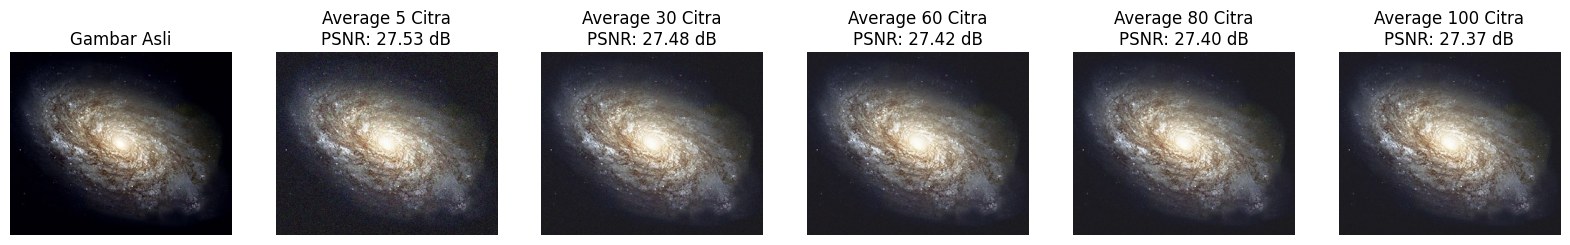

In [2]:
import cv2 as cv
import numpy as np
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Fungsi untuk menghitung MSE
def MSE(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return mse

# Fungsi untuk menghitung PSNR menggunakan rumus yang diberikan
def PSNR(img1, img2, L=256):
    mse = MSE(img1, img2)
    if mse == 0:  # Jika MSE nol, tidak ada noise sehingga PSNR tidak memiliki arti
        return 100
    psnr = 10 * log10((L - 1) ** 2 / mse)
    return psnr

# Membaca citra asli dalam mode RGB
original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)

# Membaca semua citra dengan Gaussian noise sesuai urutan dari 1.jpg hingga 100.jpg
cv_img = []
for img in sorted(glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg')):
    n = cv.imread(img)
    cv_img.append(cv.cvtColor(n, cv.COLOR_BGR2RGB))  # Ubah menjadi RGB

# Mengubah list citra ke array NumPy untuk memudahkan operasi matematika
cv_img_array = np.array(cv_img)

# Menyimpan hasil rata-rata untuk beberapa jumlah citra yang ditentukan (5, 30, 60, 80, 100)
average_images = []
psnr_values = []
jumlah_citra_list = [5, 30, 60, 80, 100]

for jumlah_citra in jumlah_citra_list:
    # Melakukan averaging pada citra pertama hingga 'jumlah_citra' tertentu
    avg_img = np.mean(cv_img_array[:jumlah_citra], axis=0).astype(np.float32)  # Gunakan float32 untuk operasi rata-rata
    avg_img_uint8 = np.clip(avg_img, 0, 255).astype(np.uint8)  # Konversi kembali ke uint8

    # Simpan citra hasil averaging
    average_images.append(avg_img_uint8)

    # Hitung PSNR dengan citra asli
    psnr_value = PSNR(original_rgb, avg_img_uint8)
    psnr_values.append(psnr_value)

# Menampilkan citra asli, hasil denoising dengan berbagai jumlah citra yang dirata-rata, dan nilai PSNR
fig, axs = plt.subplots(1, len(jumlah_citra_list) + 1, figsize=(20, 10))

# Menampilkan gambar asli di subplot pertama
axs[0].imshow(original_rgb)
axs[0].set_title('Gambar Asli')
axs[0].axis('off')

# Menampilkan gambar hasil denoising dan nilai PSNR
for i, (avg_img, psnr, jumlah_citra) in enumerate(zip(average_images, psnr_values, jumlah_citra_list)):
    axs[i+1].imshow(avg_img)
    axs[i+1].set_title(f'Average {jumlah_citra} Citra\nPSNR: {psnr:.2f} dB')
    axs[i+1].axis('off')

# Menampilkan tabel data
data = {
    'Jumlah Citra di Average': jumlah_citra_list,
    'Nilai PSNR (dB)': psnr_values
}

# Membuat DataFrame untuk menampilkan tabel
df = pd.DataFrame(data)
print(df)

plt.show()


Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah:

Proses average denoising menunjukkan bahwa jumlah citra yang optimal untuk menghasilkan kualitas terbaik (berdasarkan PSNR) adalah sekitar 5 citra. Penambahan citra lebih dari itu justru menghasilkan sedikit penurunan dalam kualitas hasil denoising, yang mungkin disebabkan oleh distribusi noise yang tidak seragam pada citra-citra tambahan.

**4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff)**,
**sedangkan image paling kanan adalah hasilnya:**

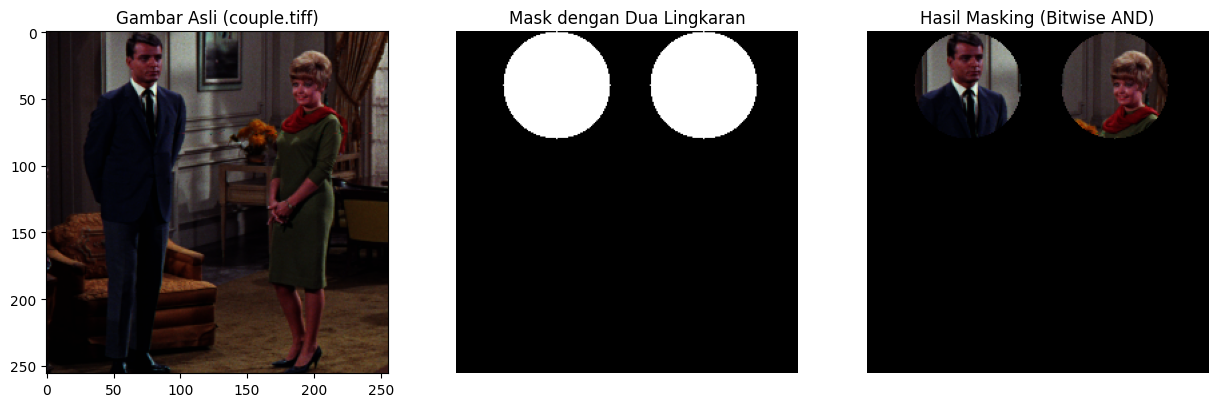

In [7]:
img = cv.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat gambar mask yang berisi dua lingkaran
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Menentukan dua posisi lingkaran
circle1_center = (75, 40)  # koordinat lingkaran pertama (x, y)
circle2_center = (185, 40)  # koordinat lingkaran kedua (x, y)
radius = 40  # radius lingkaran

# Menggambar dua lingkaran putih pada mask
cv.circle(mask, circle1_center, radius, 255, -1)
cv.circle(mask, circle2_center, radius, 255, -1)

# Menggunakan operasi bitwise AND antara gambar asli dan mask
masked_image = cv.bitwise_and(img, img, mask=mask)

# Menampilkan gambar asli, mask, dan hasil masked image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Menampilkan gambar asli
axs[0].imshow(img_rgb)
axs[0].set_title('Gambar Asli (couple.tiff)')

# Menampilkan gambar mask
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask dengan Dua Lingkaran')
axs[1].axis('off')

# Menampilkan hasil masked image
masked_image_rgb = cv.cvtColor(masked_image, cv.COLOR_BGR2RGB)
axs[2].imshow(masked_image_rgb)
axs[2].set_title('Hasil Masking (Bitwise AND)')
axs[2].axis('off')

# Tampilkan plot
plt.show()


**5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu**

**Operator Bitwise OR:**

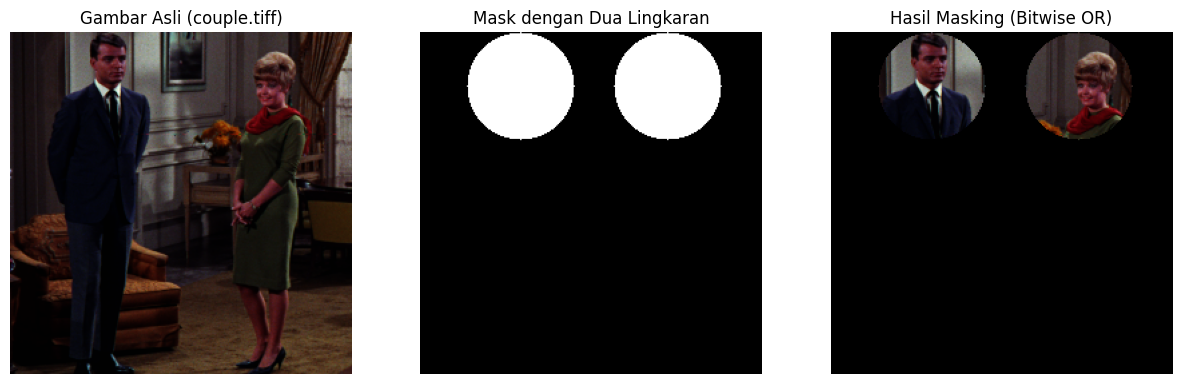

In [9]:
# Membaca gambar asli (couple.tiff) dalam mode BGR
img = cv.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat gambar mask yang berisi dua lingkaran
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Menentukan dua posisi lingkaran
circle1_center = (75, 40)  # koordinat lingkaran pertama (x, y)
circle2_center = (185, 40)  # koordinat lingkaran kedua (x, y)
radius = 40  # radius lingkaran

# Menggambar dua lingkaran putih pada mask
cv.circle(mask, circle1_center, radius, 255, -1)
cv.circle(mask, circle2_center, radius, 255, -1)

# Menggunakan operasi bitwise OR antara gambar asli dan mask
masked_image = cv.bitwise_or(img, img, mask=mask)

# Menampilkan gambar asli, mask, dan hasil masked image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Menampilkan gambar asli
axs[0].imshow(img_rgb)
axs[0].set_title('Gambar Asli (couple.tiff)')
axs[0].axis('off')

# Menampilkan gambar mask
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask dengan Dua Lingkaran')
axs[1].axis('off')

# Menampilkan hasil masked image
masked_image_rgb = cv.cvtColor(masked_image, cv.COLOR_BGR2RGB)
axs[2].imshow(masked_image_rgb)
axs[2].set_title('Hasil Masking (Bitwise OR)')
axs[2].axis('off')

# Tampilkan plot
plt.show()


**Operator Bitwise NOT**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


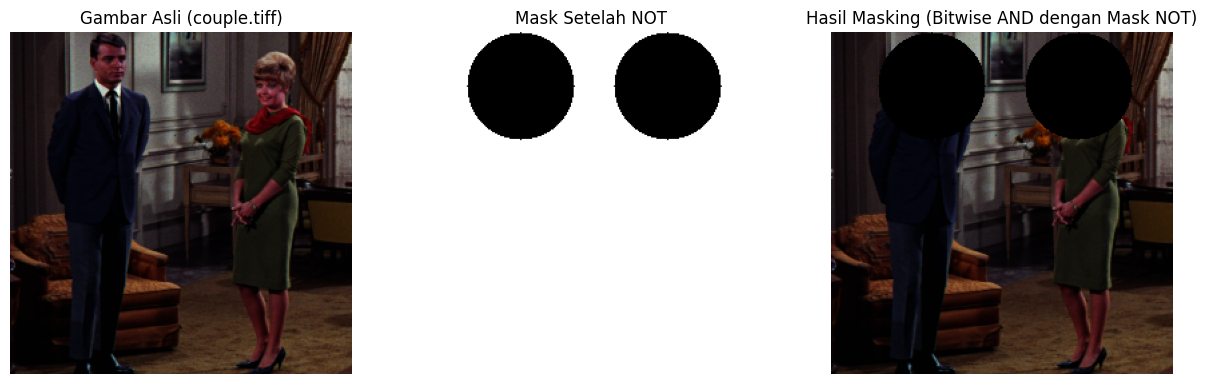

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive untuk akses file gambar
drive.mount('/content/drive')

# Membaca gambar asli (couple.tiff) dalam mode BGR
img = cv.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat gambar mask yang berisi dua lingkaran
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Menentukan dua posisi lingkaran
circle1_center = (75, 40)  # koordinat lingkaran pertama (x, y)
circle2_center = (185, 40)  # koordinat lingkaran kedua (x, y)
radius = 40  # radius lingkaran

# Menggambar dua lingkaran putih pada mask
cv.circle(mask, circle1_center, radius, 255, -1)
cv.circle(mask, circle2_center, radius, 255, -1)

# Menggunakan operasi bitwise NOT untuk membalikkan mask
mask_not = cv.bitwise_not(mask)

# Menggunakan operasi bitwise AND antara gambar asli dan mask yang dibalik (NOT)
masked_image = cv.bitwise_and(img, img, mask=mask_not)

# Menampilkan gambar asli, mask yang dibalik, dan hasil masked image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Menampilkan gambar asli
axs[0].imshow(img_rgb)
axs[0].set_title('Gambar Asli (couple.tiff)')
axs[0].axis('off')

# Menampilkan gambar mask yang dibalik (NOT)
axs[1].imshow(mask_not, cmap='gray')
axs[1].set_title('Mask Setelah NOT')
axs[1].axis('off')

# Menampilkan hasil masked image
masked_image_rgb = cv.cvtColor(masked_image, cv.COLOR_BGR2RGB)
axs[2].imshow(masked_image_rgb)
axs[2].set_title('Hasil Masking (Bitwise AND dengan Mask NOT)')
axs[2].axis('off')

# Tampilkan plot
plt.show()


**Operator Bitwise NAND**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


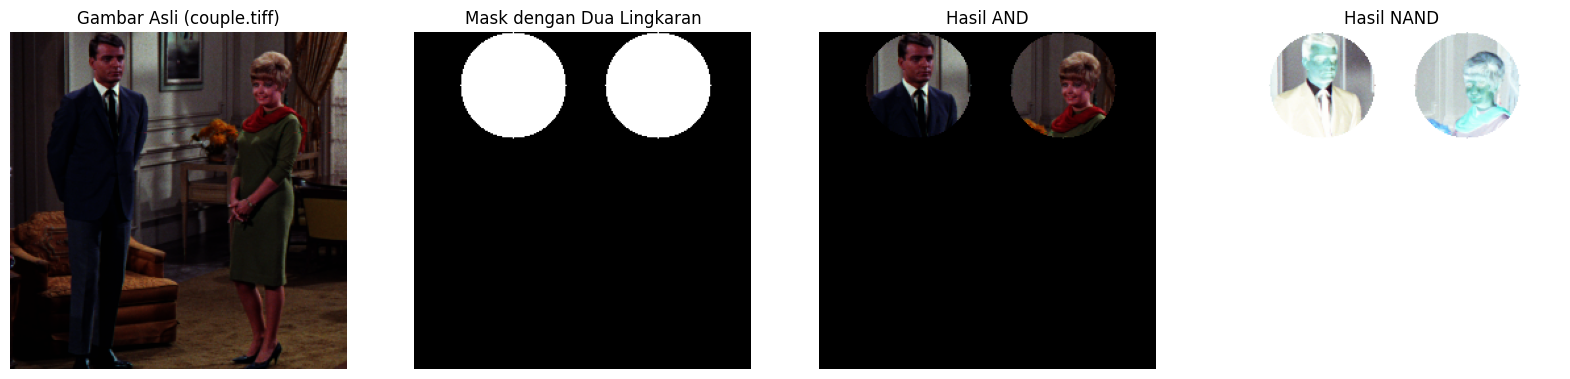

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive untuk akses file gambar
drive.mount('/content/drive')

# Membaca gambar asli (couple.tiff) dalam mode BGR
img = cv.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat gambar mask yang berisi dua lingkaran
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Menentukan dua posisi lingkaran
circle1_center = (75, 40)  # koordinat lingkaran pertama (x, y)
circle2_center = (185, 40)  # koordinat lingkaran kedua (x, y)
radius = 40  # radius lingkaran

# Menggambar dua lingkaran putih pada mask
cv.circle(mask, circle1_center, radius, 255, -1)
cv.circle(mask, circle2_center, radius, 255, -1)

# Langkah 1: Menggunakan operasi bitwise AND antara gambar asli dan mask
and_result = cv.bitwise_and(img, img, mask=mask)

# Langkah 2: Membalik hasil AND (operasi NOT untuk menghasilkan NAND)
nand_result = cv.bitwise_not(and_result)

# Menampilkan gambar asli, mask, hasil AND, dan hasil NAND
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Menampilkan gambar asli
axs[0].imshow(img_rgb)
axs[0].set_title('Gambar Asli (couple.tiff)')
axs[0].axis('off')

# Menampilkan gambar mask
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask dengan Dua Lingkaran')
axs[1].axis('off')

# Menampilkan hasil AND
and_result_rgb = cv.cvtColor(and_result, cv.COLOR_BGR2RGB)
axs[2].imshow(and_result_rgb)
axs[2].set_title('Hasil AND')
axs[2].axis('off')

# Menampilkan hasil NAND
nand_result_rgb = cv.cvtColor(nand_result, cv.COLOR_BGR2RGB)
axs[3].imshow(nand_result_rgb)
axs[3].set_title('Hasil NAND')
axs[3].axis('off')

# Tampilkan plot
plt.show()


**Operator bitwise XOR**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


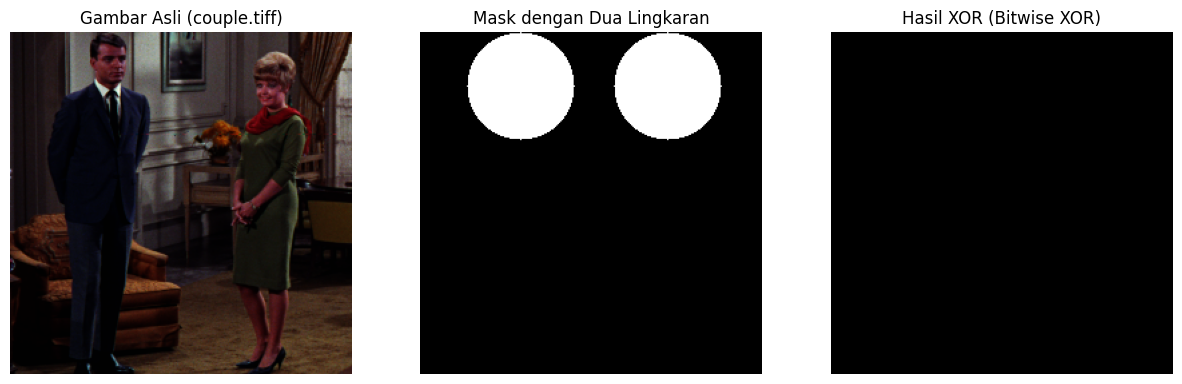

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive untuk akses file gambar
drive.mount('/content/drive')

# Membaca gambar asli (couple.tiff) dalam mode BGR
img = cv.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membuat gambar mask yang berisi dua lingkaran
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Menentukan dua posisi lingkaran
circle1_center = (75, 40)  # koordinat lingkaran pertama (x, y)
circle2_center = (185, 40)  # koordinat lingkaran kedua (x, y)
radius = 40  # radius lingkaran

# Menggambar dua lingkaran putih pada mask
cv.circle(mask, circle1_center, radius, 255, -1)
cv.circle(mask, circle2_center, radius, 255, -1)

# Menggunakan operasi bitwise XOR antara gambar asli dan mask
xor_result = cv.bitwise_xor(img, img, mask=mask)

# Menampilkan gambar asli, mask, dan hasil XOR
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Menampilkan gambar asli
axs[0].imshow(img_rgb)
axs[0].set_title('Gambar Asli (couple.tiff)')
axs[0].axis('off')

# Menampilkan gambar mask
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask dengan Dua Lingkaran')
axs[1].axis('off')

# Menampilkan hasil XOR
xor_result_rgb = cv.cvtColor(xor_result, cv.COLOR_BGR2RGB)
axs[2].imshow(xor_result_rgb)
axs[2].set_title('Hasil XOR (Bitwise XOR)')
axs[2].axis('off')

# Tampilkan plot
plt.show()
